In [ ]:
import albumentations as A

In [1]:
# using cv2 for reading and working on images
import cv2

In [2]:
import os
import matplotlib.pyplot as plt
import glob

In [3]:
from typing import List

In [5]:
# read images from the disk
ORIGINAL_DIR = r'Original_images'
AUGMENTED_DIR = r'Augmented_images'

In [6]:
BASE_DIR = r'D:\Documents\MyDocument\Road Rutting Dataset_\Annotated_rutting_dataset\Augmented_dataset'

In [7]:
# write augmented images and annotations
def write_augmented_images_bboxes(i, image_name, image, bboxes):
    image_basename = 'aug_' + image_name[:-4] + '_' + str(i) + image_name[-4:]
    label_basename = 'aug_' + image_name[:-4] + '_' + str(i) + '.txt'
    image_path = os.path.join(BASE_DIR, image_basename)
    label_path = os.path.join(BASE_DIR, label_basename)

    cv2.imwrite(image_path, image)

    f = open(label_path, 'w')
    
    for bbox in bboxes:
        x, y, w, h = map(str, bbox)
        line = '0' + ' ' + x + ' ' + y + ' ' + w + ' ' + h + '\n'
        f.write(line)
    
    f.close()

In [8]:
def show_image_annotation(image, bboxes):
    dh, dw, _ = image.shape
    
    for dt in bboxes:
        x, y, w, h = dt
        l = int((x - w / 2) * dw)
        r = int((x + w / 2) * dw)
        t = int((y - h / 2) * dh)
        b = int((y + h / 2) * dh)
        
        if l < 0:
            l = 0
        if r > dw - 1:
            r = dw - 1
        if t < 0:
            t = 0
        if b > dh - 1:
            b = dh - 1

        cv2.rectangle(image, (l, t), (r, b), (0, 0, 255), 1)
    return image

In [9]:
def show(image, bboxes, t_image, t_bboxes):
    show_image_annotation(image, bboxes)
    show_image_annotation(t_image, t_bboxes)

    plt.figure(figsize=(16,16))
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.title('Original image')

    plt.subplot(1,2,2)
    plt.imshow(t_image)
    plt.title('Augmented image')

    plt.show()

In [10]:
def bounding_box_class_labels(image_path, label_path) -> List[float]:
    img = cv2.imread(image_path)
    dh, dw, _ = img.shape

    fl = open(label_path, 'r')
    data = fl.readlines()
    fl.close()

    bounding_boxes = []
    class_labels = []

    for dt in data:
        _, x, y, w, h = map(float, dt.split(' '))
        bounding_boxes.append([x,y,w,h])
        class_labels.append('rutting')
    
    return [bounding_boxes, class_labels]

In [11]:
# defining an augmentation pipeline
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.GaussNoise(),
    A.RGBShift(r_shift_limit=30, g_shift_limit=30, b_shift_limit=30, p=0.3),
    A.ShiftScaleRotate(rotate_limit=35, p=0.3),
    A.Sharpen(),
    A.Blur(p=0.3),
], bbox_params=A.BboxParams(format='yolo',min_area=2000, min_visibility=0.10, label_fields=['class_labels']))


In [12]:
def single_image_augmentation(i, image_name, image_path, label_path):
        image = cv2.imread(image_path)
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        bboxes, class_labels = bounding_box_class_labels(image_path, label_path)       

        transformed = transform(image=image, bboxes=bboxes, class_labels=class_labels)
        transformed_image = transformed['image']
        transformed_bboxes = transformed['bboxes']
        transformed_class_labels = transformed['class_labels']

        print(f'NAME - {image_name}/{i}, IMAGE- {image.shape}, BBOXES = {bboxes}\nTRANSFORMED IMAGE- {transformed_image.shape}, T_BBOXES = {transformed_bboxes}\n')
        write_augmented_images_bboxes(i, image_name, transformed_image, transformed_bboxes)
        
        show(image, bboxes, transformed_image, transformed_bboxes)

In [13]:
# def data_augmentation(N, A):
#     counter = 0
#     for image_path in glob.glob(os.path.join(ORIGINAL_DIR, '*.png')):
#         image_basename = os.path.basename(image_path)
#         basename = image_basename[:-4]
#         label_basename = basename + '.txt'

#         image_path = os.path.join(ORIGINAL_DIR, image_basename)
#         label_path = os.path.join(ORIGINAL_DIR, label_basename)

#         for i in range(A):
#             single_image_augmentation(i+1, basename, image_path, label_path)

#         counter += 1
#         if counter == N:
#             return 


In [14]:
def data_augmentation(A, N):
    counter = 0
    for image_path in train_images:
        image_path = train_images[-1]
        image_name = image_path.split('/')[-1]        
        label_path = os.path.join(image_path[:-3] + 'txt')       

        for i in range(A):
            print(f'{image_name}_ {i+1}')
            try:
                single_image_augmentation(i+1, image_name, image_path, label_path)
            except:
                print(f'ERROR------------------- {i} -- {image_path}')
                with open(label_path) as f:
                    print(f.readlines())

        counter += 1
        if counter == N:
            return 


In [15]:
# read the train.txt file
with open('train.txt') as f:
    imagenames = f.readlines()

In [16]:
train_images = [name[17:-1] for name in imagenames]

In [17]:
train_images[262]

'4_YangSDK_04_april/Images_319_00299_right000030.png'

In [18]:
len(train_images)

806

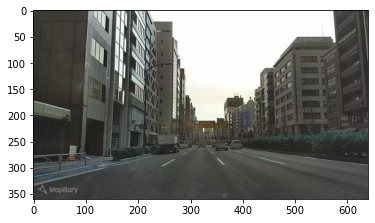

In [19]:
imagepath = os.path.join(train_images[-1])
image = cv2.imread(imagepath)
plt.imshow(image)

In [21]:
# NO_OF_IMAGES = 3
NO_OF_AUGMENTATION = 3
NO_OF_IMAGES = 2
data_augmentation(NO_OF_AUGMENTATION, NO_OF_IMAGES)

ERROR------------------- 0 -- 5_Mapillary_tokyo2/tokyo2_29638.jpg
['0 0.214285 0.869747 0.470174 0.126628\n', '0 0.103666 0.872031 0.162487 0.086302\n']
ERROR------------------- 1 -- 5_Mapillary_tokyo2/tokyo2_29638.jpg
['0 0.214285 0.869747 0.470174 0.126628\n', '0 0.103666 0.872031 0.162487 0.086302\n']
ERROR------------------- 2 -- 5_Mapillary_tokyo2/tokyo2_29638.jpg
['0 0.214285 0.869747 0.470174 0.126628\n', '0 0.103666 0.872031 0.162487 0.086302\n']
ERROR------------------- 0 -- 5_Mapillary_tokyo2/tokyo2_19103.jpg
['0 0.251611 0.78999 0.156967 0.098311\n', '0 0.086523 0.874579 0.177307 0.122088\n']
ERROR------------------- 1 -- 5_Mapillary_tokyo2/tokyo2_19103.jpg
['0 0.251611 0.78999 0.156967 0.098311\n', '0 0.086523 0.874579 0.177307 0.122088\n']
ERROR------------------- 2 -- 5_Mapillary_tokyo2/tokyo2_19103.jpg
['0 0.251611 0.78999 0.156967 0.098311\n', '0 0.086523 0.874579 0.177307 0.122088\n']
ERROR------------------- 0 -- 5_Mapillary_tokyo2/tokyo2_30460.jpg
['0 0.656554 0.9081